# Evaluation
- Average Precision
- Average Recall

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import numpy as np
import skimage.io as io
import pylab
import pandas as pd
import tqdm
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
annType = ['segm','bbox','keypoints']
annType = annType[2]      #specify type here
prefix = 'person_keypoints' if annType=='keypoints' else 'instances'
print ('Running demo for *%s* results.'%(annType))

Running demo for *keypoints* results.


In [3]:
#initialize COCO ground truth api
dataDir='../'
dataType='val2017'
annFile = '%s/annotations/%s_%s.json'%(dataDir,prefix,dataType)
cocoGt=COCO(annFile)

loading annotations into memory...
Done (t=0.20s)
creating index...
index created!


In [4]:
#initialize COCO detections api
resFile='./detectedPose.json'
cocoDt=cocoGt.loadRes(resFile)

Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!


In [30]:
inputFile = "./inputImages.csv"
df = pd.read_csv(inputFile)
df

imageID          filename
0       3156  000000003156.jpg
1       5529  000000005529.jpg
2       9448  000000009448.jpg
3       9483  000000009483.jpg
4      10764  000000010764.jpg
..       ...               ...
249   568584  000000568584.jpg
250   573258  000000573258.jpg
251   578545  000000578545.jpg
252   578871  000000578871.jpg
253   581317  000000581317.jpg

[254 rows x 2 columns]

In [34]:
imageIDs = df['imageID'].tolist()

In [73]:
# running evaluation
cocoEval = COCOeval(cocoGt,cocoDt,annType)
cocoEval.params.imgIds = imageIDs
cocoEval.params.catIds = [1]
cocoEval.params.iouType = 'keypoints'
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()

Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.688
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.932
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.776
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] = 0.688
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.739
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.945
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.823
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] = 0.739


In [56]:
def getMetricValue(imageID):    
    cocoEval.params.imgIds = imageID
    cocoEval.evaluate()
    cocoEval.accumulate()
    cocoEval.summarize()
    return (cocoEval.stats[0], cocoEval.stats[5])

In [ ]:
aps = []
ars = []
for imageID in tqdm.tqdm(imageIDs):
    print(imageID)
    ap, ar = getMetricValue(imageID)
    aps.append(ap)
    ars.append(ar)

In [58]:
getMetricValue(9448)

Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.800
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] = 0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.800
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 1.000
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] = 0.800


(0.7999999999999999, 0.8)

In [67]:
df["AP"] = aps

In [69]:
df["AR"] = ars

In [70]:
df

imageID          filename   AP   AR
0       3156  000000003156.jpg  0.9  0.9
1       5529  000000005529.jpg  1.0  1.0
2       9448  000000009448.jpg  0.8  0.8
3       9483  000000009483.jpg  0.9  0.9
4      10764  000000010764.jpg  0.8  0.8
..       ...               ...  ...  ...
249   568584  000000568584.jpg  0.0  0.0
250   573258  000000573258.jpg  1.0  1.0
251   578545  000000578545.jpg  0.4  0.4
252   578871  000000578871.jpg  0.7  0.7
253   581317  000000581317.jpg  0.8  0.8

[254 rows x 4 columns]

In [91]:
df['APint'] = df['AP'].apply(lambda x: int(x*10))

In [92]:
df

imageID          filename   AP   AR  APint
0       3156  000000003156.jpg  0.9  0.9      9
1       5529  000000005529.jpg  1.0  1.0      9
2       9448  000000009448.jpg  0.8  0.8      7
3       9483  000000009483.jpg  0.9  0.9      9
4      10764  000000010764.jpg  0.8  0.8      7
..       ...               ...  ...  ...    ...
249   568584  000000568584.jpg  0.0  0.0      0
250   573258  000000573258.jpg  1.0  1.0      9
251   578545  000000578545.jpg  0.4  0.4      3
252   578871  000000578871.jpg  0.7  0.7      6
253   581317  000000581317.jpg  0.8  0.8      7

[254 rows x 5 columns]

In [93]:
df.value_counts(['APint'])

APint
9        115
7         45
6         29
5         20
0         16
4         13
3         10
2          4
1          2
dtype: int64

0.5999999999999999 0.6


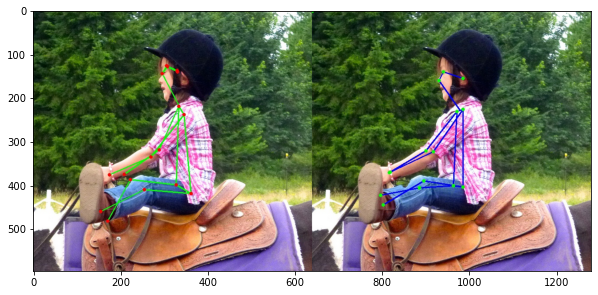

0.5999999999999999 0.6


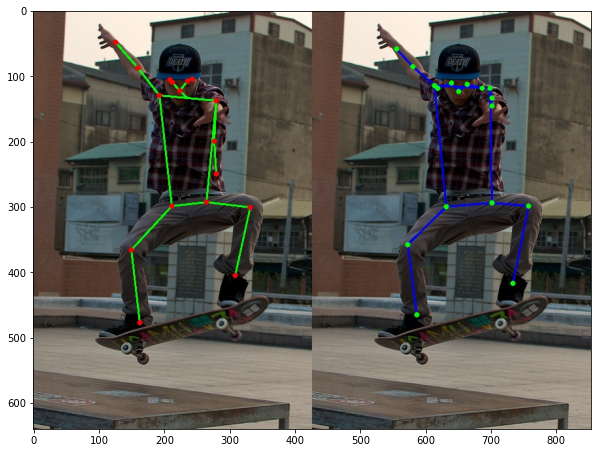

0.5999999999999999 0.6


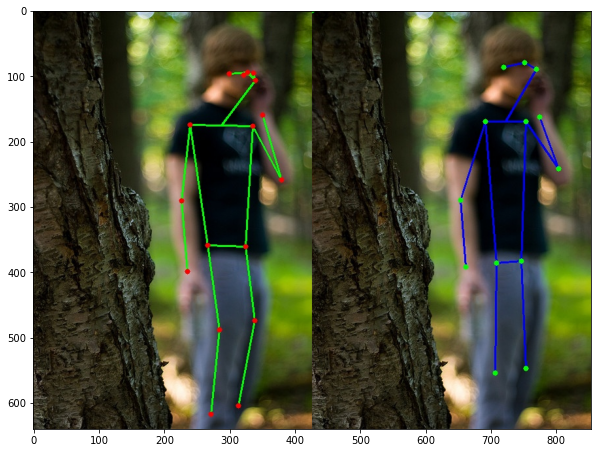

0.5999999999999999 0.6


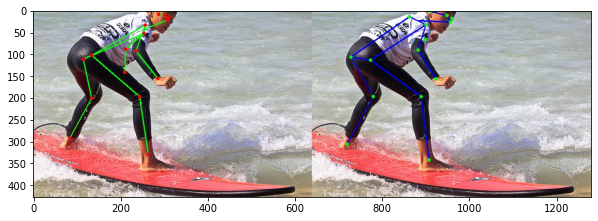

0.5999999999999999 0.6


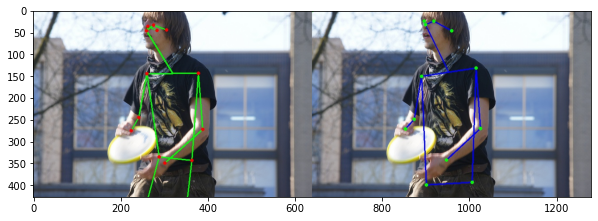

0.5999999999999999 0.6


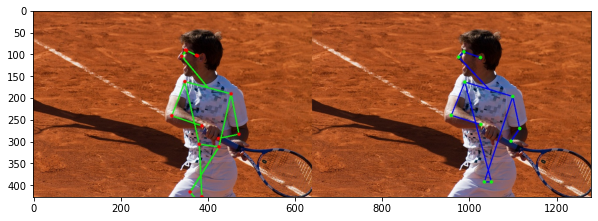

0.5999999999999999 0.6


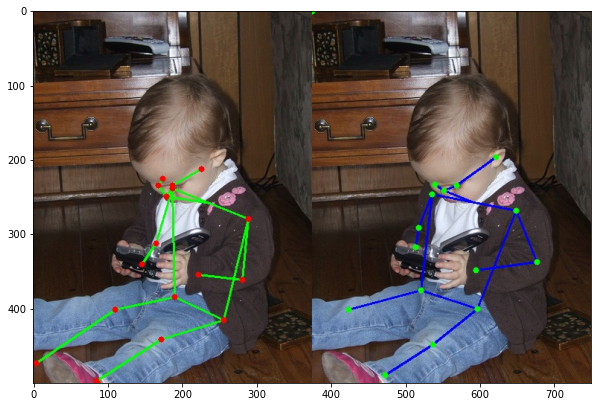

0.5999999999999999 0.6


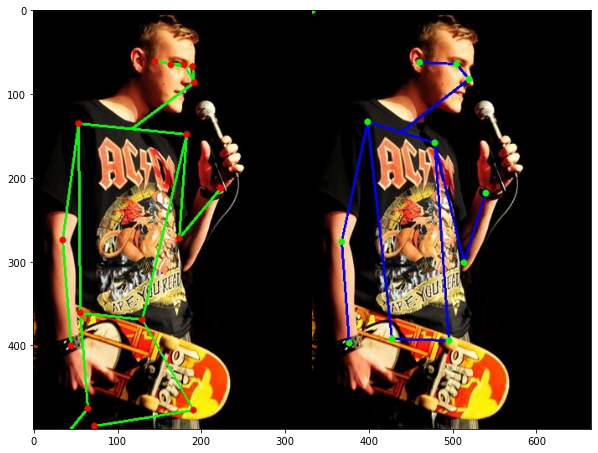

0.5999999999999999 0.6


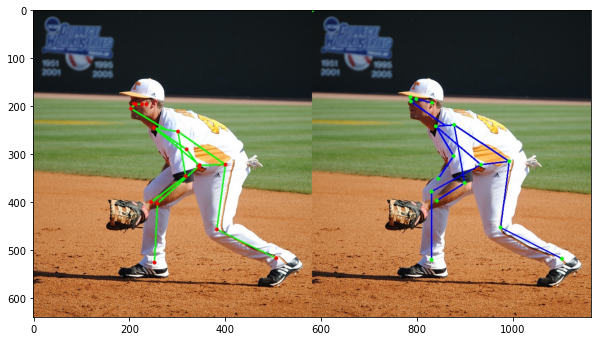

0.5999999999999999 0.6


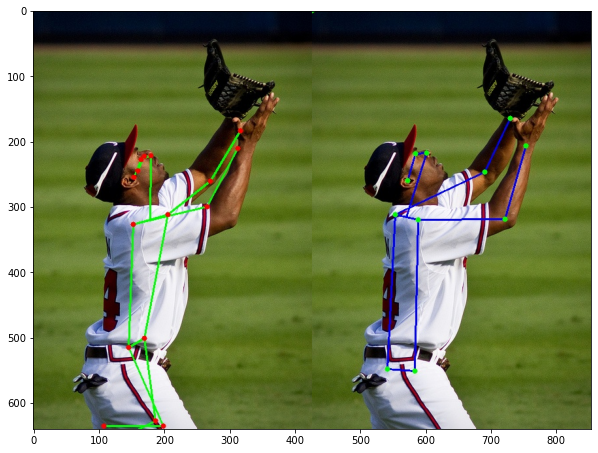

0.5999999999999999 0.6


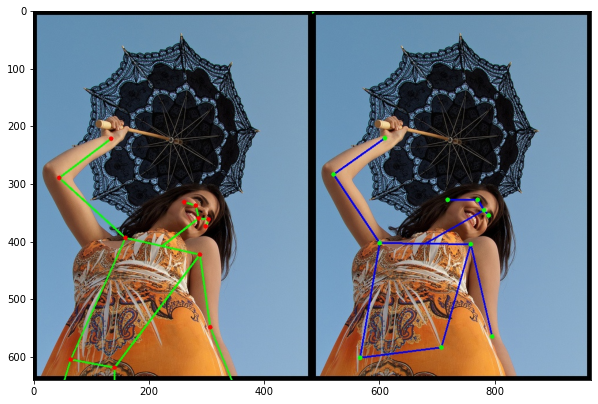

0.5999999999999999 0.6


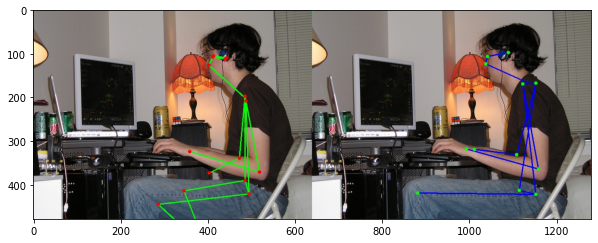

0.5999999999999999 0.6


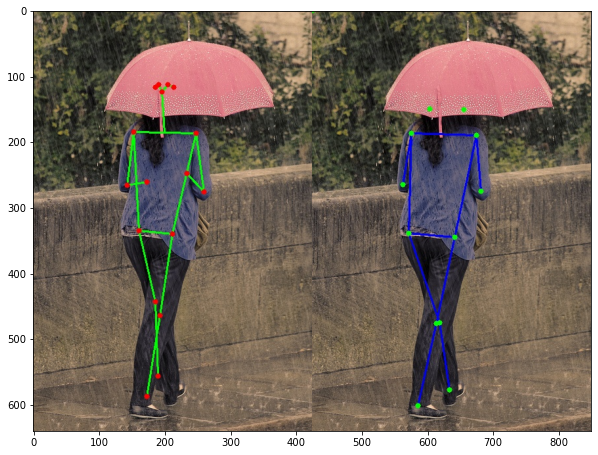

0.5999999999999999 0.6


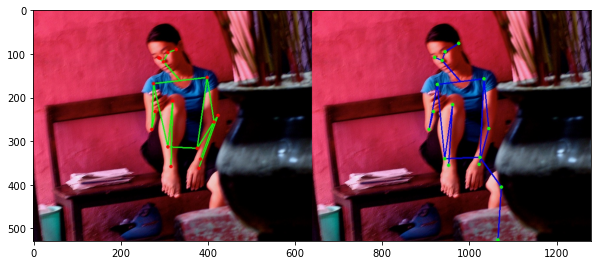

0.5999999999999999 0.6


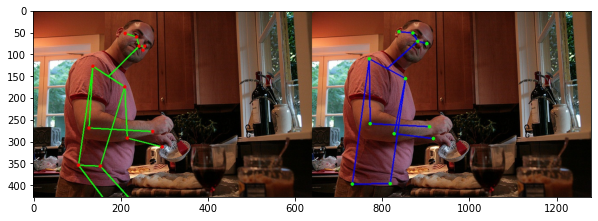

0.5999999999999999 0.6


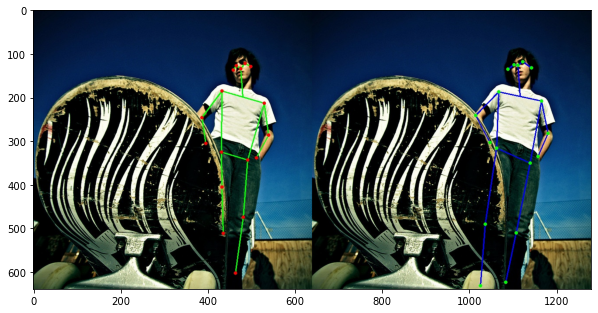

0.5999999999999999 0.6


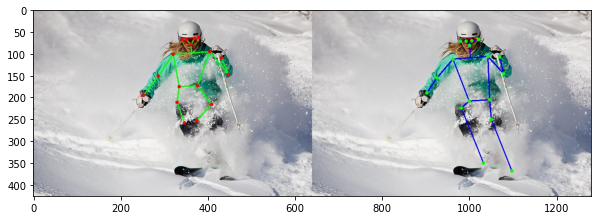

0.5999999999999999 0.6


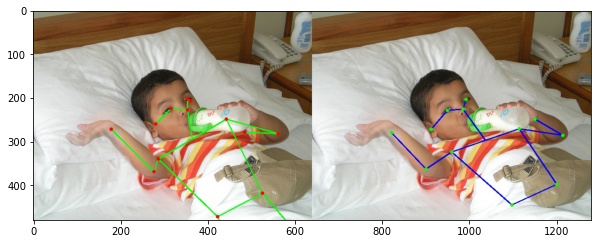

0.5999999999999999 0.6


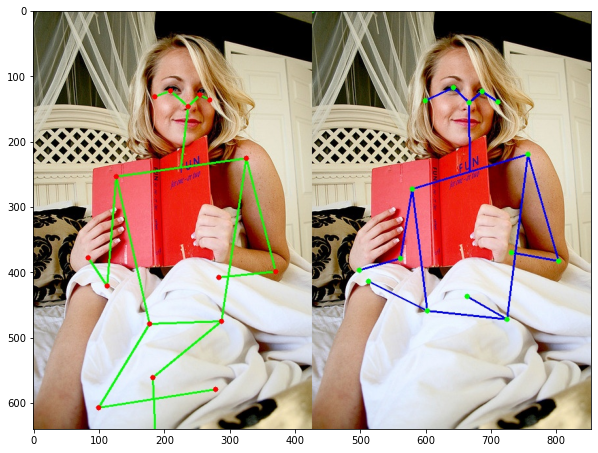

0.5999999999999999 0.6


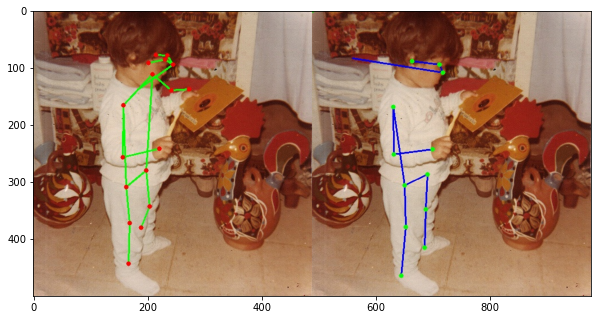

In [94]:
imageFolder = '../images/mediapipeEvaluation';
for idx, row in df[df['APint'] ==5 ].iterrows():
    print(row['AP'], row['AR'])
    filename = row['filename']
        
    imageMP = cv2.imread(f"{imageFolder}/{filename.replace('.jpg', '_mp.jpg')}")
    imageMP = cv2.cvtColor(imageMP, cv2.COLOR_BGR2RGB)
    
    
    imageCOCO = cv2.imread(f"{imageFolder}/{filename.replace('.jpg', '_coco.jpg')}")
    imageCOCO = cv2.cvtColor(imageCOCO, cv2.COLOR_BGR2RGB)
    image = cv2.hconcat([imageMP, imageCOCO])
        
    plt.imshow(image)
    plt.show()
    